In [1]:
#Import Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt

### San Francisco Airbnb Data

In [2]:
airbnb_data = "resources/sfairbnb.csv"

In [3]:
sf_airbnb_df = pd.read_csv(airbnb_data)

In [4]:
sf_airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,194,5/31/2019,1.60,1,92
1,3850,Charming room for two,4921,Kevin,NaN,Inner Sunset,37.75402,-122.45805,Private room,99,1,126,7/4/2019,1.04,3,68
2,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,8/6/2017,0.90,1,0
3,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76669,-122.45250,Private room,65,32,17,11/21/2016,0.14,9,365
4,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76487,-122.45183,Private room,65,32,8,9/12/2018,0.14,9,338


In [5]:
sf_airbnb_df[["neighbourhood", "room_type", "price", "latitude", 'longitude', 'number_of_reviews']].head()

,neighbourhood,room_type,price,latitude,longitude,number_of_reviews
0,Western Addition,Entire home/apt,170,37.76931,-122.43386,194
1,Inner Sunset,Private room,99,37.75402,-122.45805,126
2,Bernal Heights,Entire home/apt,235,37.74511,-122.42102,111
3,Haight Ashbury,Private room,65,37.76669,-122.45250,17
4,Haight Ashbury,Private room,65,37.76487,-122.45183,8


In [6]:
avg_price = pd.DataFrame(sf_airbnb_df.groupby(['neighbourhood', 'room_type', 'number_of_reviews']).mean()['price'])
avg_price.head()

price
neighbourhood room_type       number_of_reviews            
Bayview       Entire home/apt 0                  161.357143
                              1                  222.571429
                              2                   99.000000
                              3                  279.833333
                              4                  300.000000

In [7]:
avg_price = avg_price.reset_index()
avg_price

,neighbourhood,room_type,number_of_reviews,price
0,Bayview,Entire home/apt,0,161.357143
1,Bayview,Entire home/apt,1,222.571429
2,Bayview,Entire home/apt,2,99.000000
3,Bayview,Entire home/apt,3,279.833333
4,Bayview,Entire home/apt,4,300.000000
5,Bayview,Entire home/apt,5,74.000000
6,Bayview,Entire home/apt,8,120.000000
7,Bayview,Entire home/apt,9,200.000000
8,Bayview,Entire home/apt,11,380.000000
9,Bayview,Entire home/apt,13,130.500000


In [26]:
avg_price.describe()

,number_of_reviews,price
count,3488.000000,3488.000000
mean,83.910550,193.305871
std,94.186125,209.112041
min,0.000000,0.000000
25%,17.000000,99.000000
50%,51.500000,145.000000
75%,117.000000,226.541667
max,724.000000,5119.500000


In [8]:
avg_review = pd.DataFrame(avg_price.groupby(['neighbourhood', 'price']).mean()['number_of_reviews'])
avg_review.head(500)

number_of_reviews
neighbourhood         price                        
Bayview               36.000000           92.000000
                      39.000000           77.000000
                      42.000000           22.000000
                      49.000000           48.000000
                      50.000000           42.333333
                      51.000000           28.000000
                      55.000000           12.000000
                      59.000000          142.000000
                      60.000000           69.000000
                      61.750000            2.000000
                      62.000000           88.000000
                      63.000000           45.000000
                      66.500000           21.000000
                      68.000000           31.000000
                      69.000000           32.500000
                      70.000000           67.333333
                      72.500000           17.000000
                      73.000000           32.000000
                      74.000000            5.000000
                      75.000000           87.000000
                      75.500000            7.000000
                      76.000000          321.000000
                      76.555556            0.000000
                      77.200000            1.000000
                      78.000000          193.000000
                      82.333333            8.000000
                      85.000000           65.500000
                      87.000000           46.000000
                      90.000000          125.500000
                      90.500000           20.000000
...                                             ...
Downtown/Civic Center 187.200000           8.000000
                      189.000000           4.000000
                      189.750000          12.000000
                      195.000000          27.666667
                      196.000000           6.000000
                      199.000000          93.750000
                      201.000000           9.000000
                      203.500000          69.000000
                      203.800000           5.000000
                      207.250000          10.000000
                      217.000000          33.000000
                      221.200000          17.000000
                      221.933333           1.000000
                      229.000000          19.800000
                      229.333333          15.000000
                      230.000000          31.000000
                      231.226804           0.000000
                      235.000000          52.666667
                      240.000000         176.000000
                      249.000000          45.000000
                      250.000000         112.000000
                      251.000000          14.000000
                      252.000000          76.000000
                      270.000000         135.000000
                      271.333333          32.000000
                      285.285714           7.000000
                      288.000000          34.000000
                      309.000000          47.000000
                      338.000000          45.000000
                      532.000000          36.000000

[500 rows x 1 columns]

<function matplotlib.pyplot.show(*args, **kw)>

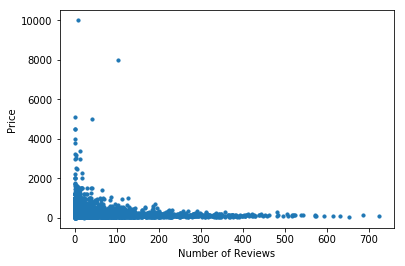

In [20]:
plt.scatter(sf_airbnb_df['number_of_reviews'], sf_airbnb_df['price'], marker='o', s=10)
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show

### Redfin MLS San Francisco Data (Current Listings)

In [21]:
mls_df = pd.read_csv("resources/sfrealestate_72219.csv")

In [22]:
mls_df

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,Redfin Data,NaN,Single Family Residential,515 Munich St,San Francisco,CA,94112,925000,3.0,2.0,...,Pre On-Market,NaN,NaN,http://www.redfin.com/CA/San-Francisco/515-Mun...,Coming Soon,38596,N,Y,37.717422,-122.429239
1,Redfin Data,NaN,Single Family Residential,76 Homestead St,San Francisco,CA,94114,1,4.0,3.0,...,Pre On-Market,NaN,NaN,http://www.redfin.com/CA/San-Francisco/76-Home...,Coming Soon,38781,N,Y,37.749760,-122.439856
2,Redfin Data,NaN,Condo/Co-op,333 Main St Unit 8F,San Francisco,CA,94105,895000,1.0,1.0,...,Pre On-Market,NaN,NaN,http://www.redfin.com/CA/San-Francisco/333-Mai...,Coming Soon,39150,N,Y,37.789131,-122.391020
3,MLS Listing,NaN,Vacant Land,886 Moultrie St,San Francisco,CA,94110,2100000,NaN,NaN,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/886-Mou...,San Francisco MLS,441005,N,Y,37.733315,-122.416504
4,MLS Listing,NaN,Vacant Land,202 Union St,San Francisco,CA,94133,500000,NaN,NaN,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/202-Uni...,San Francisco MLS,453033,N,Y,37.801341,-122.402947
5,MLS Listing,NaN,Condo/Co-op,1450 Post St #316,San Francisco,CA,94109,400000,1.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/1450-Po...,San Francisco MLS,465790,N,Y,37.786361,-122.425831
6,MLS Listing,NaN,Multi-Family (5+ Unit),285 Turk St,San Francisco,CA,94102,14750000,11.0,NaN,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/285-Tur...,San Francisco MLS,471185,N,Y,37.782710,-122.413806
7,MLS Listing,NaN,Single Family Residential,3225 Ingalls St,San Francisco,CA,94124,799000,2.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/3225-In...,San Francisco MLS,471608,N,Y,37.718662,-122.393133
8,MLS Listing,NaN,Multi-Family (5+ Unit),381 Turk St,San Francisco,CA,94102,7150000,3.0,NaN,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/381-Tur...,San Francisco MLS,473898,N,Y,37.782407,-122.415263
9,MLS Listing,NaN,Condo/Co-op,2000 Washington St #5,San Francisco,CA,94109,17500000,4.0,3.5,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/2000-Wa...,San Francisco MLS,475321,N,Y,37.792936,-122.426463


In [23]:
mls_df[["PROPERTY TYPE", "BEDS", "PRICE", "LATITUDE", 'LONGITUDE']].head()

,PROPERTY TYPE,BEDS,PRICE,LATITUDE,LONGITUDE
0,Single Family Residential,3.0,925000,37.717422,-122.429239
1,Single Family Residential,4.0,1,37.749760,-122.439856
2,Condo/Co-op,1.0,895000,37.789131,-122.391020
3,Vacant Land,NaN,2100000,37.733315,-122.416504
4,Vacant Land,NaN,500000,37.801341,-122.402947


In [24]:
mls_avg_price = pd.DataFrame(mls_df.groupby(['PROPERTY TYPE', 'BEDS']).mean()['PRICE'].round(decimals=0))
mls_avg_price

PRICE
PROPERTY TYPE             BEDS            
Condo/Co-op               0.0     488776.0
                          1.0     927157.0
                          2.0    2019578.0
                          3.0    2605356.0
                          4.0    4972667.0
                          5.0    7400000.0
Multi-Family (2-4 Unit)   1.0    2595000.0
                          2.0    2866666.0
                          3.0    2576800.0
                          4.0    2495294.0
                          5.0    2228412.0
                          6.0    2243640.0
                          7.0    2773000.0
                          8.0    2535000.0
                          9.0    1499800.0
                          10.0   4958333.0
                          11.0   2800000.0
                          14.0   3995000.0
Multi-Family (5+ Unit)    2.0    4200000.0
                          3.0    4083750.0
                          4.0    3312500.0
                          5.0    2178333.0
                          6.0    1750000.0
                          8.0    4150000.0
                          9.0    6008800.0
                          10.0   3722500.0
                          11.0   8850000.0
                          12.0   2868800.0
                          13.0   3947500.0
                          14.0   4547500.0
                          16.0   7325000.0
                          17.0   6197500.0
                          22.0   5950000.0
                          44.0   8000000.0
                          45.0  32000000.0
Other                     1.0     995000.0
                          2.0    1779000.0
                          5.0    3749000.0
                          6.0    2198000.0
                          8.0    2950000.0
                          12.0   4888888.0
Single Family Residential 0.0    2800000.0
                          1.0     828380.0
                          2.0    1461337.0
                          3.0    1817635.0
                          4.0    3196902.0
                          5.0    3076811.0
                          6.0    9329182.0
                          7.0   14395000.0
                          9.0   30000000.0
Townhouse                 2.0    1166897.0
                          3.0    2154375.0
                          4.0    2495000.0

In [28]:
mls_avg_price.describe().round(decimals=0)

,PRICE
count,53.0
mean,4723662.0
std,5827277.0
min,488776.0
25%,2198000.0
50%,2868800.0
75%,4888888.0
max,32000000.0
